In [5]:
import sys 
sys.path.append('./../src')

# my shit
from lib.finnhub.data import FinnhubData as finnhub
from lib.oscillators import macd_over_period, stochastic_over_period
from lib.charts import chart

In [6]:
ticker = 'GME'

fh = finnhub()
data = fh.get_historical_data(ticker, fh.get_daily_closings, days = 180)

data.index = data['t']
data.sort_index()
data.drop_duplicates()

,t,o,l,h,c,v
t,,,,,,
2020-09-11 21:00:00,2020-09-11 21:00:00,6.1000,6.1002,6.1200,6.13,3272
2020-09-14 21:00:00,2020-09-14 21:00:00,6.9800,6.9999,7.0800,7.08,25684
2020-09-15 21:00:00,2020-09-15 21:00:00,7.0200,7.0500,7.0201,7.10,1588
2020-09-16 21:00:00,2020-09-16 21:00:00,8.6500,8.7700,8.7500,8.90,64520
2020-09-17 21:00:00,2020-09-17 21:00:00,9.0200,9.1500,9.0700,9.25,21758
...,...,...,...,...,...,...
2021-03-04 22:00:00,2021-03-04 22:00:00,126.0000,126.8500,128.2700,129.00,161602
2021-03-05 22:00:00,2021-03-05 22:00:00,137.2500,137.5000,138.3900,138.50,73104
2021-03-08 22:00:00,2021-03-08 22:00:00,188.0000,196.2000,190.6000,196.70,302327


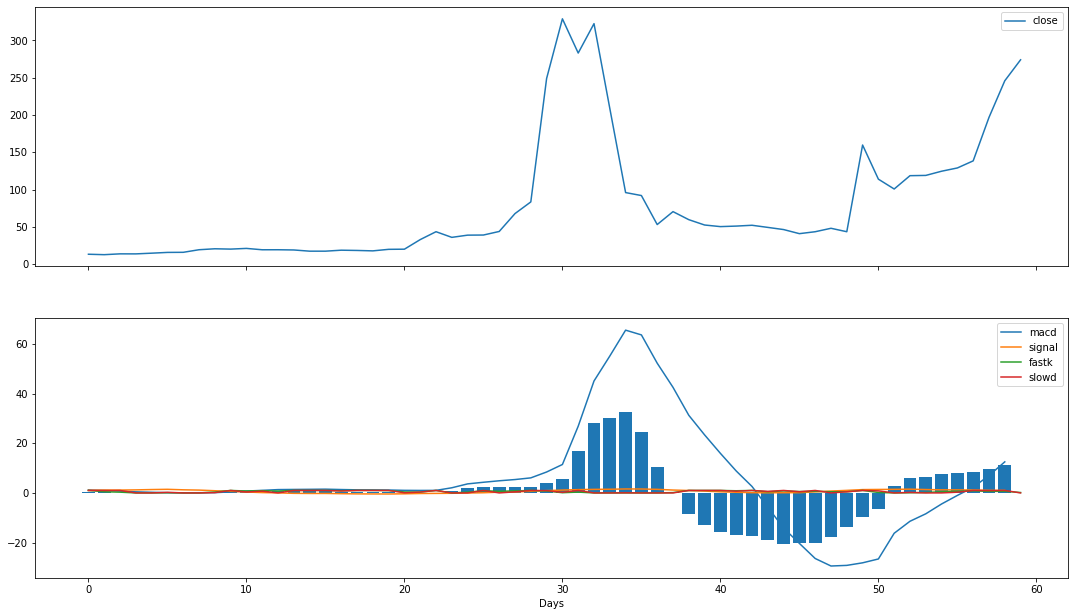

In [8]:
days = 60

chart_data = list(data['c'].tail(days))

macd_vals = macd_over_period(list(data['c']), days)
stochastic_vals = stochastic_over_period(list(data['c']), days)

macd_line = list([i[0] for i in macd_vals])[-1-days:-1]
sig_line = list([i[1] for i in macd_vals])[-1-days:-1]
histo = list([i[2] for i in macd_vals])[-1-days:-1]

fastk_data = list([i[0] for i in stochastic_vals])
slowd_data = list([i[2] for i in stochastic_vals])

oscillator_dicts = [
    { 'chart': 'line', 'data': macd_line, 'label': 'macd' },
    { 'chart': 'line', 'data': sig_line, 'label': 'signal' },
    { 'chart': 'bar', 'data': histo, 'label': ''},
    { 'chart': 'line', 'data': fastk_data, 'label': 'fastk'},
    { 'chart': 'line', 'data': slowd_data, 'label': 'slowd'}
]

data_dicts = [
    { 'label': 'close', 'data': chart_data }
]

chart(ticker, data_dicts, oscillator_dicts)